Part (a) : Times are
[3.145818134119094, 3.0274649779862584, 3.7820568094690143, 0.9827200570817158, 1.377890296230182]
###################################
Part b:
Matrix B is:
[[-2.985624e+08]
 [-2.539532e+08]
 [ 3.881358e+08]
 [-2.162680e+07]]
Matrix A is:
[[-1525518.           596888.          -564182.            35481.38358912]
 [  382136.          -901951.          -749951.          -226220.93994694]
 [  415794.           543345.           981540.           839220.04576793]
 [  335168.           122873.          -566175.          -118469.05732277]]
Matrix A inverse is:
[[-4.79160064e-07 -1.42104232e-07  1.00529737e-07  8.39985256e-07]
 [-2.30117012e-08 -1.02513966e-06 -1.06504807e-07  1.19618241e-06]
 [-4.52080166e-07 -6.09336584e-07 -2.87235544e-07 -1.00658825e-06]
 [ 7.81046571e-07  1.44679436e-06  1.54667703e-06 -1.33384883e-08]]
User positioing details
Calculated x= 100.00000000003168 Calculated y= 99.99999999993486 Calculated z= 99.99999999994988
localization error: 8.8085780

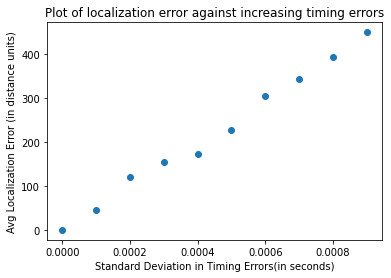

In [ ]:
#Akansh Agrawal 180050 Double Major EE-CSE
import random
import math
import numpy as np
# user location
xu = 100
yu = 100
zu = 100

# x coordinate
# y corrdinate
# z coordinate
x = []
y = []
z = []
for i in range (5):
  x.append(random.randrange(-1000000, 1000000))
  y.append(random.randrange(-1000000, 1000000))
  z.append(random.randrange(-1000000, 1000000))

t=[]
#c = 3*(10**8)
c=299792.458  # km/s
for i in range (5):
  time_i=math.sqrt((xu-x[i])**2 + (yu-y[i])**2 + (zu-z[i])**2)/c
  t.append(time_i)

#print(x)
#print(y)
#print(z)
print('Part (a) : Times are')
print(t)  


################Part 2b###############
r=[]
for i in range (5):
  r.append(t[i]*c)
b=[]
for i in range (4):
  b.append((r[0+i]**2-r[1+i]**2) - (x[0+i]**2-x[1+i]**2) - (y[0+i]**2-y[1+i]**2) - (z[0+i]**2-z[1+i]**2))
B= np.array([[b[0]],[b[1]],[b[2]],[b[3]]])
A= np.array([[ x[1]-x[0] , y[1]-y[0] , z[1]-z[0] , r[0]-r[1] ],[ x[2]-x[1] , y[2]-y[1] , z[2]-z[1] , r[1]-r[2] ],[ x[3]-x[2] , y[3]-y[2] , z[3]-z[2] , r[2]-r[3] ], [x[4]-x[3] , y[4]-y[3] , z[4]-z[3] , r[3]-r[4]] ] )
print('###################################')
print('Part b:')
print('Matrix B is:')
print(B)
print('Matrix A is:')
print(A)
Ainv=np.linalg.inv(A)
print('Matrix A inverse is:')
print(Ainv)
print('User positioing details')
M=(np.matmul(Ainv, B))/2
print("Calculated x=",M[0][0],"Calculated y=",M[1][0],"Calculated z=",M[2][0])
print('localization error:',np.sqrt((M[0][0]-100)**2+(M[1][0]-100)**2+(M[2][0]-100)**2))   # code for localization error
#################Part 2c#############
print('###################################')
print('Part (c)')
t_new=[0,0,0,0,0]
for i in range (5):
  t_new[i]=t[i]+np.random.normal(scale=0.0001)
  #t_new[i]=t[i]+t_err
print('Error Times')
print(t_new)  
r__=[]
for i in range (5):
  r__.append(t_new[i]*c)
b__=[]
for i in range (4):
  b__.append((r__[0+i]**2-r__[1+i]**2) - (x[0+i]**2-x[1+i]**2) - (y[0+i]**2-y[1+i]**2) - (z[0+i]**2-z[1+i]**2))
B0= np.array([[b__[0]],[b__[1]],[b__[2]],[b__[3]]])
A0= np.array([[ x[1]-x[0] , y[1]-y[0] , z[1]-z[0] , r__[0]-r__[1] ],[ x[2]-x[1] , y[2]-y[1] , z[2]-z[1] , r__[1]-r__[2] ],[ x[3]-x[2] , y[3]-y[2] , z[3]-z[2] , r__[2]-r__[3] ], [x[4]-x[3] , y[4]-y[3] , z[4]-z[3] , r__[3]-r__[4]] ] )
print('Matrix B is:')
print(B0)
print('Matrix A is:')
print(A0)                        
X = (np.matmul(np.linalg.inv(np.matmul(A0.T, A0)), np.matmul(A0.T, B0)))/2 
#X = np.matmul(np.linalg.inv(A0),B0)      
#Ainv0=np.linalg.inv(A0)
#print('Matrix A inverse is:')
#print(Ainv0)
print('User positioing details')
print("Calculated x=",X[0][0],"Calculated y=",X[1][0],"Calculated z=",X[2][0])
M0=X
print('localization error:',np.sqrt((M0[0][0]-100)**2+(M0[1][0]-100)**2+(M0[2][0]-100)**2))
######################################
print("############################################################")
print("Part d:")
import matplotlib.pyplot as plt
avg_loc_err=[]
std_dev=[]
for i in range(10):
  std_dev.append(0.0001*i)
Loop_run=25
for q in std_dev:
  inaccuracy=0
  for i in range(Loop_run):
    err_plus_time=[j+np.random.normal(scale=q) for j in t]
    #print(err_plus_time)
    r_i=[]
    for k in range (5):
      r_i.append(err_plus_time[k]*c)
    b_i=[]  
    for k in range (4):
      b_i.append((r_i[0+k]**2-r_i[1+k]**2)- (x[0+k]**2-x[1+k]**2) - (y[0+k]**2-y[1+k]**2) - (z[0+k]**2-z[1+k]**2))

    Bi= np.array([[b_i[0]],[b_i[1]],[b_i[2]],[b_i[3]]])
    Ai= np.array([[x[1]-x[0] , y[1]-y[0] , z[1]-z[0] , r_i[0]-r_i[1] ],[ x[2]-x[1] , y[2]-y[1] , z[2]-z[1] , r_i[1]-r_i[2] ],[ x[3]-x[2] , y[3]-y[2] , z[3]-z[2] , r_i[2]-r_i[3] ], [x[4]-x[3] , y[4]-y[3] , z[4]-z[3] , r_i[3]-r_i[4]] ] )

    Xi = (np.matmul(np.linalg.inv(np.matmul(Ai.T, Ai)), np.matmul(Ai.T, Bi))) /2
    inaccuracy += ( (Xi[0][0]-100)**2 + (Xi[1][0]-100)**2 + (Xi[2][0]-100)**2 )**0.5
  avg_err=inaccuracy/Loop_run
  avg_loc_err.append(avg_err)

plt.scatter(std_dev, avg_loc_err)
plt.xlabel('Standard Deviation in Timing Errors(in seconds)')
plt.ylabel('Avg Localization Error (in distance units)')
plt.title('Plot of localization error against increasing timing errors')
plt.show()